In [17]:
import pandas as pd
import numpy as np
import re as re
import textblob as tb

Lecture de données JSON

In [18]:
pdTweet = pd.read_json(path_or_buf="versailles_tweets_100.json")
pdTweet

,_id,public_metrics,id,conversation_id,author_id,text,geo,lang,created_at,entities,context_annotations,attachments
0,1421616335700824064,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421616335700824064,1421616335700824064,1339914264522461184,Goumin des éléphants joueurs la même fatigue m...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 23:38:41+00:00,"{'hashtags': [{'start': 52, 'end': 63, 'tag': ...",NaN,NaN
1,1421599703116943360,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421599703116943360,1421599703116943360,1339914264522461184,@ericbailly24 @maxigr04del mes tontons vous a...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:32:35+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...","[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN
2,1421599163561742336,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1421599163561742336,1421599163561742336,1339914264522461184,Ah oui le sommeil là sera compliqué. #CIV est...,{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:30:27+00:00,"{'hashtags': [{'start': 37, 'end': 41, 'tag': ...","[{'domain': {'id': '6', 'name': 'Sports Event'...",NaN
3,1421591889095057408,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421591889095057408,1421591889095057408,1339914264522461184,"31 juillet , journée internationale de la femm...",{'place_id': '00b8943291443c8c'},fr,2021-07-31 22:01:32+00:00,"{'hashtags': [{'start': 60, 'end': 65, 'tag': ...",NaN,NaN
4,1421582795294617600,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421582795294617600,1421582795294617600,717025418,Le pedigree 😂😂😂😂 https://t.co/D3Rv7A2BOF,{'place_id': '00b8943291443c8c'},es,2021-07-31 21:25:24+00:00,"{'urls': [{'start': 17, 'end': 40, 'url': 'htt...",NaN,NaN
5,1421581383454052352,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1421581383454052352,1421256177359466496,992904738516717568,@isabelle170516 @leonna_julie @Steiner2502 Vou...,{'place_id': '011a304d683c2461'},fr,2021-07-31 21:19:48+00:00,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",NaN,NaN
6,1421575939700445184,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421575939700445184,1421256177359466496,992904738516717568,@LynLyna12 @leonna_julie La grande muette cont...,{'place_id': '011a304d683c2461'},fr,2021-07-31 20:58:10+00:00,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",NaN,NaN
7,1421569996858269696,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421569996858269696,1421569996858269696,736523371,Under wsh 😳😳😳,{'place_id': '011a304d683c2461'},en,2021-07-31 20:34:33+00:00,NaN,NaN,NaN
8,1421563798503272448,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1421563798503272448,1421563798503272448,1471684208,Les bains d'apollon #versailles #nocturne #app...,"{'place_id': '011a304d683c2461', 'coordinates'...",fr,2021-07-31 20:09:55+00:00,"{'urls': [{'start': 76, 'end': 99, 'url': 'htt...",NaN,NaN
9,1421562928176803840,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",1421562928176803840,1421553997811421184,992904738516717568,@leonna_julie Le rdv aujourd'hui aura tenu se...,{'place_id': '011a304d683c2461'},fr,2021-07-31 20:06:28+00:00,"{'mentions': [{'start': 0, 'end': 13, 'usernam...",NaN,{'media_keys': ['3_1421562925999869960']}


<H3> Partie nettoyage du texte <H3/>

Retire les retours à la ligne:

In [19]:

def no_retourchariot(chiffre):
    """Fonction qui retire les retours à la ligne du texte"""
    patern = re.compile("\n")
    result = patern.sub(r"",pdTweet["text"][chiffre])
    return result

Extraction des tweet sans emoticônes (Expressions régulières)


Source: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b?permalink_comment_id=3315605#gistcomment-3315605

In [20]:

def no_emoticone(chiffre):
        """fonction qui retire tout les émoticones du tweet"""
        patern  = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                                "]+", flags = re.UNICODE)
        
        result = patern.sub(r"",chiffre)
        return result

Retire mention du texte d'un tweet

In [21]:
def no_mention(chiffre):
    """Fonction qui retire les mentions du tweet"""
    patern = re.compile("@\S*")
    result = patern.sub(r"",chiffre)
    return result

Retire les hastags d'un tweet

In [22]:
def no_hastags(chiffre):
    """fonction qui retire les hastags du tweet"""
    patern = re.compile("#\S*")
    result = patern.sub(r"",chiffre)
    return result

Retire l'intégration d'un URL dans un tweet

In [23]:

def no_URL(chiffre):
    """fonction qui retire l'URL d'un tweet"""
    patern = re.compile("https://\S*")
    result = patern.sub(r"", chiffre)
    return result


Fonction qui nettoie le texte avec toutes les fonctions créé auparavant.

In [24]:
def menage(NumeroTweet):
    "fonction qui applique toutes les autres fonction pour avoir un texte propre"
    result = no_retourchariot(NumeroTweet)
    result = no_emoticone(result)
    result = no_mention(result)
    result = no_hastags(result)
    result = no_URL(result)
    return result

In [25]:
pdTweetFiltre = pd.DataFrame()

Insérer le texte nettoyer des tweet dans le data Frame TweetFiltrer

In [26]:
#insertion du texte nettoyer dans le Data Frame TweetFiltrer
list_texte = []
for i in range(0,20):
    texte = menage(i)
    list_texte.append(texte)
pdTweetFiltre["Texte"] = list_texte
pdTweetFiltre

,Texte
0,Goumin des éléphants joueurs la même fatigue m...
1,"mes tontons vous avez fait votre part , JO ..."
2,Ah oui le sommeil là sera compliqué. est éli...
3,"31 juillet , journée internationale de la femm..."
4,Le pedigree
5,Vous avez tt à fait raison! le silence inco...
6,La grande muette continue et continuera de l...
7,Under wsh
8,Les bains d'apollon à Château de Versailles
9,Le rdv aujourd'hui aura tenu ses promesses! ...


<H3>Partie gestion Mentions URl et Hashtags<H3/>

In [27]:
# Crée un dataFrame avec les données inscrites dans entites, en columns on a Url, Mentions et Hashtags
pdEntities = pdTweet["entities"].apply(pd.Series)
# On supprime la column 0 qui ne contient rien.
del pdEntities[0]
pdEntities

,hashtags,mentions,urls
0,"[{'start': 52, 'end': 63, 'tag': 'twitter225'}]",NaN,NaN
1,"[{'start': 126, 'end': 142, 'tag': 'Supportric...","[{'start': 0, 'end': 13, 'username': 'ericbail...",NaN
2,"[{'start': 37, 'end': 41, 'tag': 'CIV'}]",NaN,NaN
3,"[{'start': 60, 'end': 65, 'tag': 'jifa'}]",NaN,NaN
4,NaN,NaN,"[{'start': 17, 'end': 40, 'url': 'https://t.co..."
5,NaN,"[{'start': 0, 'end': 15, 'username': 'isabelle...",NaN
6,NaN,"[{'start': 0, 'end': 10, 'username': 'LynLyna1...",NaN
7,NaN,NaN,NaN
8,"[{'start': 20, 'end': 31, 'tag': 'versailles'}...",NaN,"[{'start': 76, 'end': 99, 'url': 'https://t.co..."
9,NaN,"[{'start': 0, 'end': 13, 'username': 'leonna_j...","[{'start': 279, 'end': 302, 'url': 'https://t...."


Cette cellule trie les informations stockées dans la colonnes "Entities" dans le dataframe initial et le stocke dans un autre dataframe.

In [28]:
for columns_name in pdEntities:
        lenSeries = len(pdEntities[columns_name])
        lElement = []
        if columns_name == "hashtags":
                key = "tag"
        elif columns_name == "mentions":
                key = "username"
        elif columns_name == "urls":
                key = "url"
        else:
                key = None
        for i in range(0,lenSeries):
                lElementUnder = []
                if type(pdEntities[columns_name][i]) == list:
                        for j in range(0, int(len(pdEntities[columns_name][i]))):
                                lElementUnder.append(pdEntities[columns_name][i][j].get(key))
                else:
                        lElementUnder.append(None)
                lElement.append(lElementUnder)
        lElement = pd.Series(lElement)
        pdTweetFiltre[columns_name] = lElement
pdTweetFiltre

,Texte,hashtags,mentions,urls
0,Goumin des éléphants joueurs la même fatigue m...,[twitter225],[None],[None]
1,"mes tontons vous avez fait votre part , JO ...","[SupportriceMazo, domie, CIV]","[ericbailly24, maxigr04del]",[None]
2,Ah oui le sommeil là sera compliqué. est éli...,[CIV],[None],[None]
3,"31 juillet , journée internationale de la femm...",[jifa],[None],[None]
4,Le pedigree,[None],[None],[https://t.co/D3Rv7A2BOF]
5,Vous avez tt à fait raison! le silence inco...,[None],"[isabelle170516, leonna_julie, Steiner2502]",[None]
6,La grande muette continue et continuera de l...,[None],"[LynLyna12, leonna_julie]",[None]
7,Under wsh,[None],[None],[None]
8,Les bains d'apollon à Château de Versailles,"[versailles, nocturne, appollon]",[None],[https://t.co/SFGXP06r61]
9,Le rdv aujourd'hui aura tenu ses promesses! ...,[None],[leonna_julie],[https://t.co/F6zvVfWwAf]


On rajoute les id des auteurs dans le dataframe

In [29]:
pdTweetFiltre["author"] = pdTweet["author_id"]
pdTweetFiltre

,Texte,hashtags,mentions,urls,author
0,Goumin des éléphants joueurs la même fatigue m...,[twitter225],[None],[None],1339914264522461184
1,"mes tontons vous avez fait votre part , JO ...","[SupportriceMazo, domie, CIV]","[ericbailly24, maxigr04del]",[None],1339914264522461184
2,Ah oui le sommeil là sera compliqué. est éli...,[CIV],[None],[None],1339914264522461184
3,"31 juillet , journée internationale de la femm...",[jifa],[None],[None],1339914264522461184
4,Le pedigree,[None],[None],[https://t.co/D3Rv7A2BOF],717025418
5,Vous avez tt à fait raison! le silence inco...,[None],"[isabelle170516, leonna_julie, Steiner2502]",[None],992904738516717568
6,La grande muette continue et continuera de l...,[None],"[LynLyna12, leonna_julie]",[None],992904738516717568
7,Under wsh,[None],[None],[None],736523371
8,Les bains d'apollon à Château de Versailles,"[versailles, nocturne, appollon]",[None],[https://t.co/SFGXP06r61],1471684208
9,Le rdv aujourd'hui aura tenu ses promesses! ...,[None],[leonna_julie],[https://t.co/F6zvVfWwAf],992904738516717568


On fait les mêmes manipulations pour les topics.
(A détailler encore parce que c'est pas exactement les mêmes manipulations.)

In [30]:
sTopics = []
for ligne in pdTweet["context_annotations"]:
    sTopicsTweet = []
    if type(ligne) == list:
        lenSeries = len(ligne)
        for i in range(0, lenSeries):
            topics = ligne[i].get("domain").get("name")
            if topics not in sTopicsTweet:
                sTopicsTweet.append(topics)
    else:
        sTopicsTweet.append(None)
    sTopics.append(sTopicsTweet)
pdTweetFiltre["topics"] = sTopics
pdTweetFiltre

,Texte,hashtags,mentions,urls,author,topics
0,Goumin des éléphants joueurs la même fatigue m...,[twitter225],[None],[None],1339914264522461184,[None]
1,"mes tontons vous avez fait votre part , JO ...","[SupportriceMazo, domie, CIV]","[ericbailly24, maxigr04del]",[None],1339914264522461184,"[Sports Event, Person, Athlete]"
2,Ah oui le sommeil là sera compliqué. est éli...,[CIV],[None],[None],1339914264522461184,[Sports Event]
3,"31 juillet , journée internationale de la femm...",[jifa],[None],[None],1339914264522461184,[None]
4,Le pedigree,[None],[None],[https://t.co/D3Rv7A2BOF],717025418,[None]
5,Vous avez tt à fait raison! le silence inco...,[None],"[isabelle170516, leonna_julie, Steiner2502]",[None],992904738516717568,[None]
6,La grande muette continue et continuera de l...,[None],"[LynLyna12, leonna_julie]",[None],992904738516717568,[None]
7,Under wsh,[None],[None],[None],736523371,[None]
8,Les bains d'apollon à Château de Versailles,"[versailles, nocturne, appollon]",[None],[https://t.co/SFGXP06r61],1471684208,[None]
9,Le rdv aujourd'hui aura tenu ses promesses! ...,[None],[leonna_julie],[https://t.co/F6zvVfWwAf],992904738516717568,[None]


In [31]:
pdTweetFiltre.shape[0]

20

Utilisation de la libraire textBlob pour donner le sentiment (négatif ou positif) du tweet
 à partir de son texte.

In [32]:
analysis = tb.TextBlob("").sentiment
analysis

Sentiment(polarity=0.0, subjectivity=0.0)

<H4>Top K hashtags:</H4>

On va lire dans le dataFrame qu'on a créé les différents hashtags présent.
Pour chaque hashtags, si il est dans la liste des clés déja renseigné, on ajoute + 1 a la valeur de la clé. Sinon, on le rajoute dans la liste des clés et on l'initialise à 1.

On va ensuite obtenir les valeurs les plus grandes du dictionnaire avec la fonction max. Si la valeur est représenté plusieurs fois (2ième exaquo) on montrera toutes les valeurs qui correpondent au maximum.

Les données sont organisées de la même manière pour les mentions et les url. On peut donc créer une fonction qui prend 3 arguments: k qui correspond le nombre de valeurs à afficher, source qui est le dataframe duquel on va afficher le classement et entities qui est une variable pour faire le choix entre mentions, hashtags et topics.

In [33]:
def extraire_dict(entities:str, source:pd.DataFrame):
    """
    Cette fonction permet d'extraire les donnnées du dataframe sous forme de dictionnaire.
    On peut utiliser dans "entities" les arguments: Hashtags, mentions, author et topics.
    Author est vu comme une exception car il n'est pas stocké de la même manière que les autres.
    """
    dict_Entities = {}
    series_Entities = source[entities]
    if entities == "author":
        dataFrame_Top = pd.DataFrame(series_Entities.value_counts())
        dict_Entities = dataFrame_Top.to_dict()["author"]
    else:
        for tweet in series_Entities:
            for i in range(0, len(tweet)):
                value = dict_Entities.get(tweet[i])
                # Value représente le nombre de fois que le hashtags a déjà été lu dans le DataFrame.
                # Si c'est la première fois qu'on le voit, value retourne None et donc on initialise à 1
                if value != None:
                    dict_Entities[tweet[i]] = value + 1
                else:
                    dict_Entities[tweet[i]] = 1
        # On supprime la colonne qui montre les tweets sans hashtags
        del dict_Entities[None]
    return dict_Entities

In [34]:
def top(k:int, source:pd.DataFrame, entities:str):
    """
    On prend dans source (qui doit être un data frame) le podium de l'entités demandé,
    L'entité peut être les hashtags, les utilisateurs, les topics ou encore les mentions.
    On réutilise la fonction créer avant pour obtenir le dictionnaire, puis on applique le trie
    pour afficher le top.
    """
    dict_Entities = extraire_dict(entities, source)
    dict_Top = {}
    # On veut le top k 
    for top in range(1, k + 1):
        if dict_Entities.values().__len__() != 0:
            dict_Top[top] = []
            maxRepresenter = max(dict_Entities.values())
            for key, values in dict_Entities.items():
                if values == maxRepresenter:
                    dict_Top[top].append(key)
            for candidat in dict_Top[top]:
                del dict_Entities[candidat]
    dataFrame_Top = pd.DataFrame()
    for top, hashtags in dict_Top.items():
        # Pour éviter les problèmes de tailles de colonnes, on va créer un df éphémère à chaque fois
        dfEphemere = pd.DataFrame()
        dfEphemere[top] = pd.Series(hashtags)
        # Puis on va le joindre à l'ancien df.
        dataFrame_Top = pd.concat([dataFrame_Top, dfEphemere], join="outer", axis=1)
    return dataFrame_Top

In [35]:
top(3, pdTweetFiltre, "hashtags")

,1,2
0,CIV,twitter225
1,NaN,SupportriceMazo
2,NaN,domie
3,NaN,jifa
4,NaN,versailles
5,NaN,nocturne
6,NaN,appollon


Pour obtenir le nombre de publication d'un utilisateur, le nombre de publications qui comporte un hashtags en particulier ou encore le nombre de publication par topics, on prend la fonction qui permet de nous donner un dictionnaire et on cherche dans ce dictionnaire la clé qu'il nous intéresse.

In [36]:
def nbr_publi(name, source:pd.DataFrame, domaine:str):
    """
    Fonction qui retourne le nombre de publication dans un domaine. Le domain peut-être soit author, soit hashtags, soit mentions.
    La variable name définit soit l'id de l'utilisateur, soit le hashtags soit le nom du topic dans le cas d'une recherche 
    par topics.
    """
    return extraire_dict(domaine, source).get(name)

In [37]:
nbr_publi("CIV", pdTweetFiltre, domaine="hashtags")

2

GRAPHE :

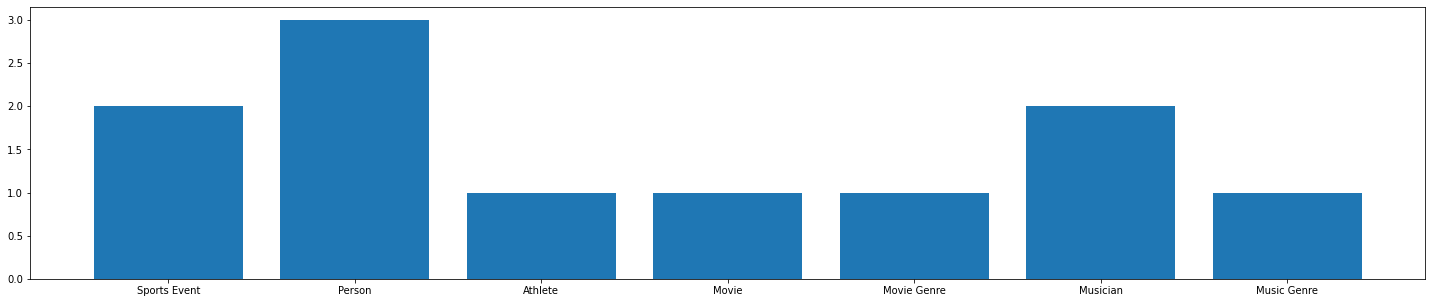

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def graph(categorie: str):
    extract= list(extraire_dict(categorie, pdTweetFiltre).items())
    x = []
    h = []
    for elmt in extract:
        x.append(elmt[0])
        h.append(elmt[1])
    plt.figure(figsize=(25,5))
    plt.bar(x,h)


graph("topics")


In [41]:
categories = list(extraire_dict("hashtags",pdTweetFiltre).items())
print(categories)

[('twitter225', 1), ('SupportriceMazo', 1), ('domie', 1), ('CIV', 2), ('jifa', 1), ('versailles', 1), ('nocturne', 1), ('appollon', 1)]
